In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint

## Hamiltoniano de Hénon-Heiles

El hamiltoniano de Hénoon-Heiles sirve para estudiar el movimiento de las estrellas en el centro de la galaxia. 
El hamiltoniano tiene la siguiente forma:

$$H=\frac{P_x^{2}}{2m}+\frac{P_y^{2}}{2m}+ V(x,y)$$

Con el potencial dado por la siguiente forma:

$$V(x,y)=\frac{1}{2}k(x^{2}+y^{2})+\lambda(x^2y-\frac{1}{3}y^{3})$$

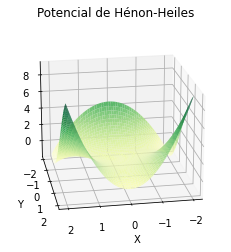

In [2]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

Z=(0.5)*(X**2 +Y**2)+((X**2)*Y-(Y**3)/3)
#Se crea la grafica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='YlGn')
#Perzonalizacion de la grafica
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Potencial de Hénon-Heiles')
ax.view_init(elev=20, azim=80)
# Mostrar la gráfica
plt.savefig("Pontencial3D.png")
plt.show()


Text(0, 0.5, 'Y')

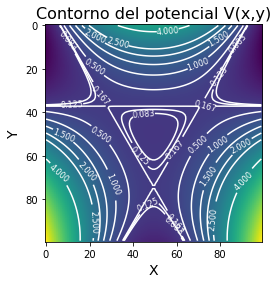

In [3]:
plt.imshow(Z)
levels = [1/12,1/8,1/6,1/2,1,1.5,2,2.5,4]  # Niveles de las líneas equipotenciales
contour_plot =plt.contour(Z, levels=levels, colors='white')
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.title("Contorno del potencial V(x,y)",fontsize=16)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)

In [4]:
#Se define esta funcion para pasar los puntos x,y a pixeles en la imagen de la siguiente celda
def n(x):
    return ((x*100/2)+50)

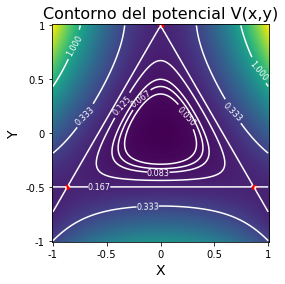

In [32]:
#Se crea una cuadricula de -1 1 en 100 puntos para poder calcular las lineas potenciales
x = np.linspace(-1, 1, 101)
y = np.linspace(1, -1, 101)
X, Y = np.meshgrid(x, y)

#Para cada punto X,Y se calcula el potencial
V=(0.5)*(X**2 +Y**2)+((X**2)*Y-(Y**3)/3)
plt.imshow(V)

#Se grafica los niveles de las lineas equipotenciales
levels = [1/20,1/15,1/12,1/8,1/6,1/3,1]  # Niveles de las líneas equipotenciales
contour_plot =plt.contour(Z, levels=levels, colors='white')
plt.clabel(contour_plot, inline=True, fontsize=8)
plt.title("Contorno del potencial V(x,y)",fontsize=16)
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)

#Colocar los ejes a -1,1
new_xticks = [0, 25, 50, 75,100]
new_xticklabels = [-1, -0.5, 0, 0.5, 1]
new_yticklabels = [1, 0.5, 0, -0.5, -1]
plt.xticks(new_xticks, new_xticklabels)
plt.yticks(new_xticks, new_yticklabels)

#Colorear los puntos criticos inestables
plt.scatter(n(0),n(-1),c="r",s=20)
plt.scatter(n(((3)**0.5)/2),n(0.5),c="r",s=20)
plt.scatter(n(-((3)**0.5)/2),n(0.5),c="r",s=20)
plt.savefig("ContornPotencial.png")

### De las ecuaciones de hamilton:
$$\frac{\partial H}{\partial x}=-\dot{p_x}=kx+2 \lambda xy$$

$$\frac{\partial H}{\partial y}=-\dot{p_y}=ky+ \lambda(x^{2}-y^{2})$$

$$\frac{\partial H}{\partial p_x}=\dot{x}=\frac{p_x}{m}$$

$$\frac{\partial H}{\partial p_y}=\dot{y}=\frac{p_y}{m}$$

In [6]:
#Se define las aceleraciones con las ecuaciones de hamilton
def avances(x,y):
    ax=-(x+2*x*y)
    ay=((y**2)-y)-(x**2)
    return ax,ay

# A partir de las ecuaciones de hamilton
def vx_0(E,y,vy,x):
    return ((2*E-(y**2)-(vy**2)+((2/3)*(y**3))-(2*(x*x*y)-(x**2)))**0.5)



### Seccion para la evolucion temporal de puntos en las condiciones iniciales

In [33]:
#Se define una funcion diferencial con las ecuaciones  de hamilton para luego ser colocadas en la funcion odeint.
def f(X,t):
    xi,yi,vxi,vyi=X
    f2,f3=avances(xi,yi)
    return [vxi, vyi,f2,f3]

#Funcion que define la evolucion temporal a partir de la energia y parametros iniciales
def evolucionT(E,x0,y0,vy0,n,tf):
    #A partir de la energia y x_0 y_0 vy_0 se obtiene el v_x
    vx0=vx_0(E,y0,vy0,x0)
    #Se crea un lista del tiempo
    t=np.linspace(0,tf,n)
    #Se resuelve la ecuacion diferencial
    evol=odeint(f,[x0,y0,vx0,vy0],t)
    return evol


In [34]:
#Se grafica las orbitas para condiciones iniciales dadas
def graficaOrbital(E,x0,y0,vy0,n,t):
    Data=evolucionT(E,x0,y0,vy0,n,t)
    x=Data[:,0]
    y=Data[:,1]
    plt.plot(x,y,linewidth=0.1,c="b")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Orbitas para Energia ="+str(round(E,4)))
    plt.savefig("Orbita"+str(round(E,4))+".png")

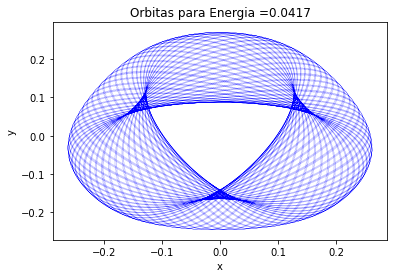

In [9]:
#Construccion de una orbita con una energia de 1/24, x0=0, y0=0.22,py0=0.08, para 1000000 puntos y un tiempo de 1000
graficaOrbital(1/24,0,0.22,0.08,1000000,1000)

In [35]:
#Para graficar una nueva orbita cambiar esto por los valores requeridos
graficaOrbital(#E,x0,y0,py0,n,t)

SyntaxError: unexpected EOF while parsing (<ipython-input-35-07e03be858fe>, line 2)

In [10]:
#Se define funciones opcionales que servirán para evolucionar puntos y obtener sus posiciones y velocidades
def funOpc(E,x0,y0,vy0,n,tf):
    Data=evolucionT(E,x0,y0,vy0,n,tf)
    x=Data[:,0]
    y=Data[:,1]
    vx=Data[:,2]
    vy=Data[:,3]
    return x,y,vx,vy

#Funcion que retorna todos los puntos x,y,vx,vy que cumplan que su valor de x sea igual a xtajada con una diferencia menor a 0.01
def tajada(x,y,vx,vy,xtajada):
    taj=[]
    for i in range(len(x)):
        if(np.abs(x[i-1]-xtajada)<0.001):
            taj.append([x[i],y[i],vx[i],vy[i]])
    tajada=np.array(taj)
    return tajada

#Funcion que le hace una especie de Tomografia al toro para diferentes x
def CTtoro(x,y,vx,vy):
    xtaj=np.linspace(min(x),max(x),20)
    CT=[]
    for j in xtaj:
        taj=[]
        for i in range(len(x)):
            if(np.abs(x[i-1]-j)<0.001):
                taj.append([x[i],y[i],vx[i],vy[i]])
        CT.append(np.array(taj))
    return (CT)

In [23]:
#Ejemplo del CT del toro
x,y,vx,vy=funOpc(1/24,0,0.22,0.08,10000000,10000)
CT=CTtoro(x,y,vx,vy)

(-0.9128019214392962,
 0.9236628812073171,
 -0.5710906698303754,
 0.9931817302804189)

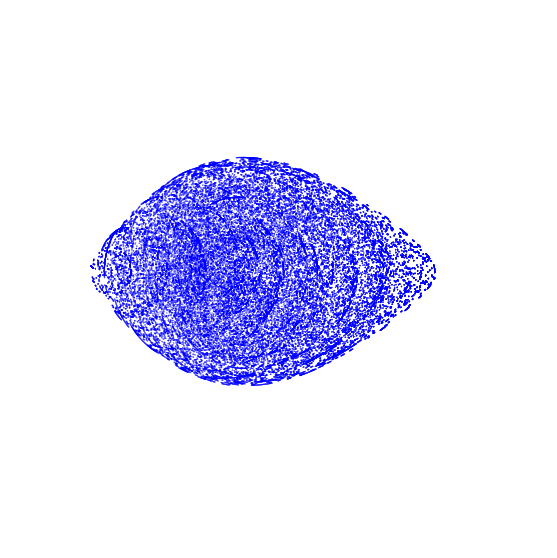

In [26]:
#Construccion del toro 3D para los datos dados en la anterior
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for k in CT:
    x=k[:,0]
    y=k[:,1]
    px=k[:,2]
    py=k[:,3]
    ax.scatter(x, y, py,c="b", marker='o',s=0.02)
ax.view_init(elev=0, azim=20)
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje PY')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axis('off')


In [13]:
#Defincion de la secciones poincare
def PoincareSection(E,x0,yn,pyn,n,t,xtaj,ny,nvy):
    #Cuadricula de las condiciones iniciales para valores maximos de yn y pyn
    y0=np.linspace(0,yn,ny)
    vy0=np.linspace(0,pyn,nvy)
    Section=[]
    for i in range(ny):
        for j in range(nvy):
            x,y,vx,vy=funOpc(E,x0,y0[i],vy0[j],n,t)
            taj=tajada(x,y,vx,vy,xtaj)            
            plt.scatter(taj[:,1],taj[:,3],s=0.05)
    plt.xlabel("y",fontsize=14)
    plt.ylabel(r"$p_y$",fontsize=14)
    plt.title("Seccion de Poincare para E="+str(round(E,3)) )
    plt.xlim(-0.03,0.6)
    plt.ylim(-0.2,0.2)
    plt.savefig("Poincare"+str(round(E,3))+".png")

In [14]:
#Construccion 3D del diagrama de fase 
def PoincareSection3D(E,x0,yn,pyn,n,t,xtaj,ny,nvy):
    y0=np.linspace(0,yn,ny)
    vy0=np.linspace(0,pyn,nvy)
    Section=[]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(ny):
        for j in range(nvy):
            x,y,vx,vy=funOpc(E,x0,y0[i],vy0[j],n,t)
            taj=tajada(x,y,vx,vy,xtaj)
            ax.scatter(taj[:,0],taj[:,1],taj[:3],c="b", marker='o',s=0.02)
    ax.set_xlabel('Eje X')
    ax.set_ylabel('Eje Y')
    ax.set_zlabel('Eje PY')
    plt.title("Seccion de Poincare para E="+str(round(E,3)) )
    plt.savefig("Poincare"+str(round(E,3))+".png")

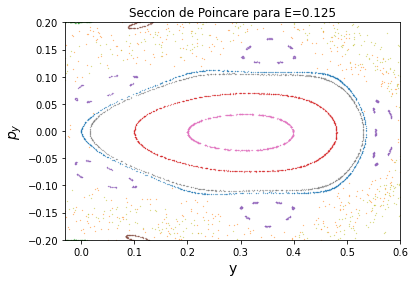

In [17]:
PoincareSection(1/8,0,0.2,0.2,1000000,10000,0,3,3)

## Intendo Nudos
### Este codigo es solo opcional porque se intento realizar los nudos homoclinicos utilizando un mapa de poincare encontrado en la literatura para el sistema de Henon-Heiles. Sin embargo, no funcionó

In [36]:
def Jacobiana(x,y,k):
    Vx=x+(2*x*y*k)
    Vy=y+k*((x**2)-(y**2))
    Vxy=2*x*k
    Vxx=1+(2*y*k)
    Vyy=1-(2*y*k)
    return ((((Vx*Vyy)-(Vy*Vxy))/((Vxx*Vyy)-(Vxy**2))),(((Vx*Vxy)-(Vy*Vxx))/((Vxx*Vyy)-(Vxy**2))))

In [38]:
#Proceso iterativo para un mapa que hace x_{n+1}=x_{n}+Jacobiana
def iterativo(x,y,k):
    pos=[]
    x0,y0=x,y
    pos.append([x,y])
    i=0
    while(i<10000):
        xn=pos[i][0]-Jacobiana(pos[i][0],pos[i][1],k)[0]
        yn=pos[i][1]+Jacobiana(pos[i][0],pos[i][1],k)[1]
        i=i+1
        pos.append([xn,yn])
        if((np.abs(xn-x0)<0.0001 and np.abs(yn-y0)<0.0001)):
            print("iteracion compleada")
            break
        if((xn==0 and yn==0)):
            break
    return pos 

In [39]:
pos=iterativo(0.57+0.01,0.15+0.01,1)

[0.58       0.52303571 1.10297909 ... 0.8660254  0.8660254  0.8660254 ] [ 0.16       -0.43517857 -0.57187417 ... -0.5        -0.5
 -0.5       ]


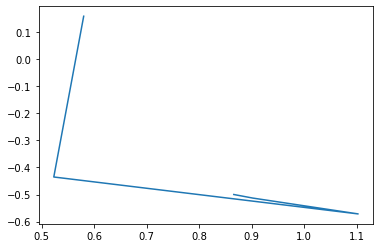

In [40]:
pos=np.array(pos)
x=pos[:,0]
y=pos[:,1]
print(x,y)
plt.plot(x,y)

### Exponentes de Liaponuv

In [58]:
#Funcion para calcular los exponentes de lyaponuv donde se se calculará las diferencias cuando se le da una vuelta al toro en x
def Exponentes(eta,dx,n):
    Sol=evolucionT(eta[0],eta[1],eta[2],eta[3],n,10000)
    Sold=evolucionT(eta[0],eta[1]+dx[0],eta[2]+dx[1],eta[3],n,10000)
    x=Sol[:,0]
    y=Sol[:,1]
    vx=Sol[:,2]
    vy=Sol[:,3]
    xd=Sold[:,0]
    yd=Sold[:,1]
    vxd=Sold[:,2]
    vyd=Sold[:,3]
    
    vx0=vx_0(eta[0],eta[2],eta[3],eta[1])
    vx0d=vx_0(eta[0],eta[2]+dx[1],eta[3],eta[1]+dx[0])
    #Se calcula la diferencia entre los puntos iniciales de cada trayectoria
    dp0=((dx[0]**2)+(dx[1]**2)+(vx0-vx0d)**2)**0.5
    i=15
    while(i<(len(x)+15)):
        if(np.abs(x[i]-0)<0.001):
                Poin=[x[i],y[i],vx[i],vy[i]]
                print(i)
                break
        i=i+1
    j=15
    while(j<(len(xd)+15)):
        if(np.abs(xd[j]-0)<0.001):
                dx=Poin[0]-xd[j]
                dy=Poin[1]-yd[j]
                dvx=Poin[2]-vxd[j]
                dvy=Poin[3]-vyd[j]
                print(j)
                break
        j=j+1
    
    dp=(dx**2+dy**2+dvx**2+dvy**2)**0.5
    #Se calcula los exponetnes con la formula
    lambdas=(np.log(dp/dp0))
    return lambdas

In [59]:
Exponentes([1/24,0,0.022,-0.08],[0,0.02],100000)

452
359


3.319503744929813

#### 

In [64]:
#Funcion para calcular los exponentes de Lyaponiiv dinamicos
def Exponentes2(eta,dx,n):
    #Se calculan las trayectorias para las condiciones iniciales
    Sol=evolucionT(eta[0],eta[1],eta[2],eta[3],n,10000)

    x=Sol[:,0]
    y=Sol[:,1]
    vx=Sol[:,2]
    vy=Sol[:,3]
    #Se calculan la trayectoria para las condiciones iniciales y aplicando su desviacion
    Sold=evolucionT(eta[0],eta[1]+dx[0],eta[2]+dx[1],eta[3],n,10000)
    xd=Sold[:,0]
    yd=Sold[:,1]
    vxd=Sold[:,2]
    vyd=Sold[:,3]
    #Se calculan las velocidades en x para los puntos iniciales 
    vx0=vx_0(eta[0],eta[2],eta[3],eta[1])
    vx0d=vx_0(eta[0],eta[2]+dx[1],eta[3],eta[1]+dx[0])
    t=np.linspace(0.01,10000,n)
    #Se calcula la diferencia entre los puntos iniciales de cada trayectoria
    dp0=((dx[0]**2)+(dx[1]**2)+(vx0-vx0d)**2)**0.5
    #Diferencia en las posiciones
    dx=x-xd
    dy=y-yd
    dvx=vx-vxd
    dvy=vy-vyd
    
    dp=(dx**2+dy**2+dvx**2+dvy**2)**0.5
    #Se calcula los exponetnes con la formula
    lambdas=(np.log(dp/dp0))/t
    return (lambdas,t,Sol,Sold)

In [116]:
#Calcula los exponentes de lyaponuv y da las trayectorias de estos puntos. La primera entrada son las condiciones inciales, la segunda entra corresponde al vector dx de cambio y la tercera el numero de puntos
l,t,x,xp=Exponentes2([1/24,0,0.128846,0.018450],[0.01,0],100000)


In [113]:
max(l)

0.09243273371956061

(-0.1, 0.15)

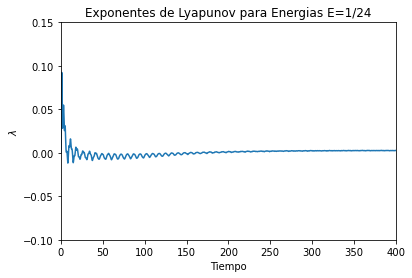

In [114]:
#Se grafica los exponentes de lyaponuv
plt.plot(t,l)
plt.xlim(0,400)
plt.title("Exponentes de Lyapunov para Energias E=1/24")
plt.xlabel("Tiempo")
plt.ylabel(r"$\lambda$")
plt.savefig("Liaponuv24n0-0230387.png")
plt.ylim(-0.1,0.15)

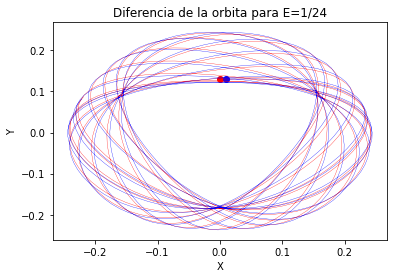

In [115]:
xi=x[:,0]
yi=x[:,1]
xf=xp[:,0]
yf=xp[:,1]
plt.scatter(xi[0],yi[0],c="r")
plt.scatter(xf[0],yf[0],c="b")
plt.plot(xi[:800],yi[:800],linewidth=0.3,c="r")
plt.plot(xf[:800],yf[:800],linewidth=0.3,c="b")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Diferencia de la orbita para E=1/24")
plt.savefig("Energi24.png")